In [15]:
import pandas as pd
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
warnings.filterwarnings('ignore')

In [16]:
# those variables will be updated by Mercury framework
# please keep all variables to be updated in one cell
varname = 'AI_01.PT001.IN_ENG'
date_start = '2022-01-01'
date_end = '2022-01-31'
validity = ['0', '1']
agitation = []
batch = 'Batch_A012'
alarms = ['176-Guasto motore Mest']

In [22]:
alarms_number = [int(x.split('-')[0]) for x in alarms]

In [18]:
df_batch = pd.read_csv("df_batch_no_dup.csv")
df_batch['TimeString_Begin'] = pd.to_datetime(df_batch['TimeString_Begin'], format='%d/%m/%Y %H:%M:%S')
df_batch['TimeString_End'] = pd.to_datetime(df_batch['TimeString_End'], format='%d/%m/%Y %H:%M:%S')
df_batch = df_batch[(df_batch['TimeString_Begin'] > datetime.strptime(date_start, '%Y-%m-%d'))]
df_batch = df_batch[(df_batch['TimeString_End'] < datetime.strptime(date_end, '%Y-%m-%d'))]
df_batch_work = df_batch[(df_batch['MsgText'].isin(agitation))]
df_batch_work = df_batch_work[df_batch_work['Impianto'] == 'MIXER']
#df_batch_work.shape

In [19]:
df_trends = pd.read_csv("trends_temp_press.csv")
df_trends['TimeString'] = pd.to_datetime(df_trends['TimeString'], format='%d/%m/%Y %H:%M:%S')
df_trends = df_trends[(df_trends['TimeString'] > datetime.strptime(date_start, '%Y-%m-%d'))]
df_trends = df_trends[(df_trends['TimeString'] < datetime.strptime(date_end, '%Y-%m-%d'))]
#print(df_trends.shape)
#df_trends.head()

In [20]:
df_alarms = pd.read_csv('Alarms.csv')
df_alarms['TimeString_Begin'] = pd.to_datetime(df_alarms['TimeString_Begin'], format='%Y-%m-%d %H:%M:%S')
df_alarms['TimeString_End'] = pd.to_datetime(df_alarms['TimeString_End'], format='%Y-%m-%d %H:%M:%S')
df_alarms = df_alarms[(df_alarms['TimeString_Begin'] > datetime.strptime(date_start, '%Y-%m-%d'))]
df_alarms = df_alarms[(df_alarms['TimeString_End'] < datetime.strptime(date_end, '%Y-%m-%d'))]
df_alarms_sub = df_alarms[(df_alarms['MsgNumber'].isin(alarms_number))]
df_alarms_sub = df_alarms_sub[(df_alarms_sub['Batch']==batch)].reset_index(drop=True)
#df_alarms_sub.shape

12 alarms
0 batches


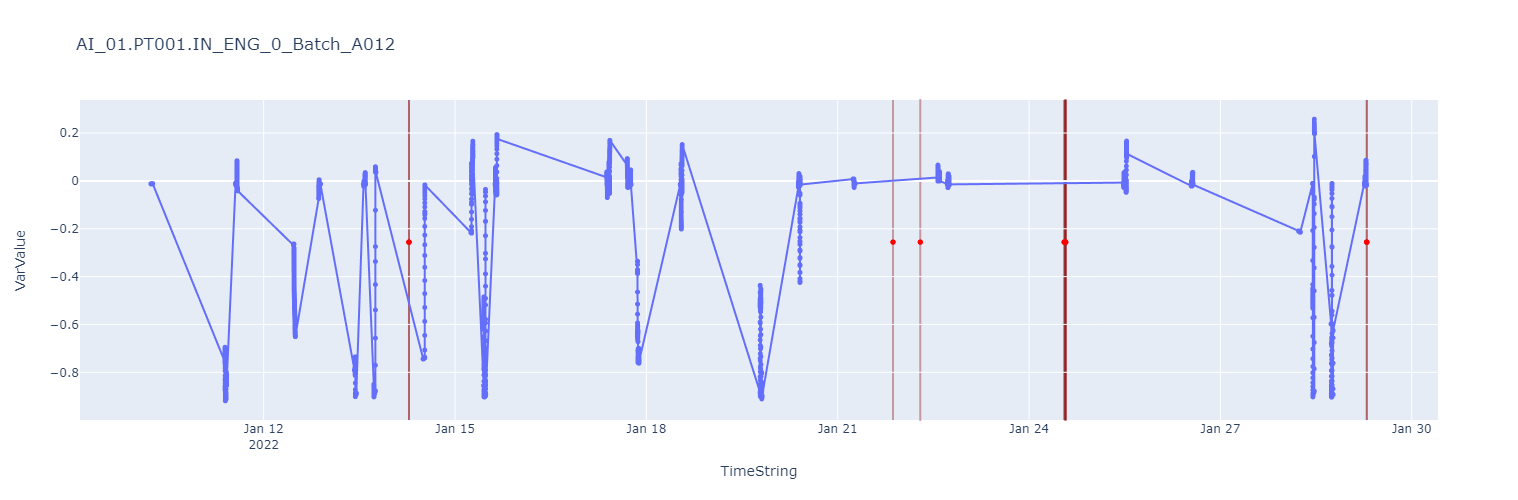

In [21]:
df_sub = df_trends[df_trends['VarName']==varname]
df_sub = df_sub[df_trends['Validity'].isin([int(x) for x in validity])]
df_sub = df_sub[df_trends['Batch']==batch]

df_sub = df_sub.sort_values(by='TimeString')

df_sub['day'] = df_sub['TimeString'].astype(str).str[:10]

#day_measurements = set(df_sub['day'])

#df_alarms_sub = df_alarms_sub[df_alarms_sub['TimeString_Begin'].astype(str).str[:10].isin(day_measurements)]
print(str(df_alarms_sub.shape[0])+" alarms")

df_sub_batch = df_batch_work[df_batch_work['Batch']==batch]
df_sub_batch = df_sub_batch.reset_index(drop=True)
print(str(df_sub_batch.shape[0])+" batches")

mean_value = df_sub["VarValue"].mean()

fig = px.line(df_sub, x="TimeString", y="VarValue", markers=True, title=varname+'_'+validity[0]+'_'+batch, width=1500, height=500)

fig.update_traces(marker=dict(size=5))

for i in range(df_sub_batch.shape[0]):
    fig.add_vrect(x0=df_sub_batch.iloc[i]['TimeString_Begin'], x1=df_sub_batch.iloc[i]['TimeString_End'], 
                  fillcolor="green", opacity=0.35, line=dict(color='darkgreen'), layer='below')
    
    fig.add_scatter(x=[df_sub_batch.iloc[i]['TimeString_Begin']], y=[mean_value], mode="markers", showlegend=False,
                marker=dict(size=5, color="green"), hovertemplate = str(df_sub_batch.iloc[i]['TimeString_Begin'])+', '+str(df_sub_batch.iloc[i]['MsgText']) + ' - begin', name='')
    
    fig.add_scatter(x=[df_sub_batch.iloc[i]['TimeString_End']], y=[mean_value], mode="markers", showlegend=False,
                marker=dict(size=5, color="green"),  hovertemplate = str(df_sub_batch.iloc[i]['TimeString_End'])+', '+str(df_sub_batch.iloc[i]['MsgText'])+ ' - end', name='')
    
for i in range(df_alarms_sub.shape[0]):
    fig.add_vrect(x0=df_alarms_sub.iloc[i]['TimeString_Begin'], x1=df_alarms_sub.iloc[i]['TimeString_End'], 
                  fillcolor="red", opacity=0.35, line=dict(color='darkred'), layer='below', name = str(df_alarms_sub.iloc[i]['MsgNumber']), editable=True)
    
    fig.add_scatter(x=[df_alarms_sub.iloc[i]['TimeString_Begin']], y=[mean_value], mode="markers", showlegend=False,
                marker=dict(size=5, color="red"), hovertemplate = str(df_alarms_sub.iloc[i]['TimeString_Begin'])+', Code: '+str(df_alarms_sub.iloc[i]['MsgNumber']), name='')
    
    fig.add_scatter(x=[df_alarms_sub.iloc[i]['TimeString_End']], y=[mean_value], mode="markers", showlegend=False,
                marker=dict(size=5, color="red"),  hovertemplate = str(df_alarms_sub.iloc[i]['TimeString_End'])+', Code: '+str(df_alarms_sub.iloc[i]['MsgNumber']), name='')
    
    


fig.show()

In [53]:
#mercury watch dashboard.ipynb